## Michigan COVID-19 Hospitalization and Testing Data: Visualization
----

In this project, I perform a short and simple visual analysis of current COVID-19 hospitalization and testing data in the State of Michigan. The dataset is publically available and updated daily. 

In [1]:
## dataset url: https://covidtracking.com/data

In [2]:
## import packages
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
## initialize dataset
m_df = pd.read_csv('michigan.csv')

In [4]:
## dataset information
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      144 non-null    int64  
 1   state                     144 non-null    object 
 2   positive                  144 non-null    int64  
 3   negative                  140 non-null    float64
 4   pending                   12 non-null     float64
 5   hospitalizedCurrently     105 non-null    float64
 6   hospitalizedCumulative    0 non-null      float64
 7   inIcuCurrently            105 non-null    float64
 8   inIcuCumulative           0 non-null      float64
 9   onVentilatorCurrently     105 non-null    float64
 10  onVentilatorCumulative    0 non-null      float64
 11  recovered                 111 non-null    float64
 12  dataQualityGrade          122 non-null    object 
 13  lastUpdateEt              133 non-null    object 
 14  dateModifi

In [5]:
## first 5 rows of the dataset
m_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200722,MI,83730,1475883.0,NaN,680.0,NaN,210.0,NaN,120.0,...,1559613,6,0,9d31b6e6000eae3ec2b0d4c4ee8d33e6d71886f4,0,0,0,0,0,NaN
1,20200721,MI,83059,1446316.0,NaN,680.0,NaN,210.0,NaN,130.0,...,1529375,9,0,d960a56043e8c35e8dccc4e3db73d23224ec8f1a,0,0,0,0,0,NaN
2,20200720,MI,82395,1424394.0,NaN,680.0,NaN,210.0,NaN,102.0,...,1506789,7,0,c16170404a788e5e7a27c8e45404ab6392f273b2,0,0,0,0,0,NaN
3,20200719,MI,81868,1402591.0,NaN,680.0,NaN,201.0,NaN,102.0,...,1484459,2,0,4ae4ddbd2b0aec3df77f27b6ff0a827d78a17987,0,0,0,0,0,NaN
4,20200718,MI,81338,1374740.0,NaN,680.0,NaN,201.0,NaN,102.0,...,1456078,9,0,5a503c9242f272a6f46887d01d64359adc113ffc,0,0,0,0,0,NaN


In [6]:
## check for missing values
print("missing values:", m_df.isnull().values.any())

missing values: True


In [7]:
## function for missing data 
def check_missing_data(m_df):
    return m_df.isnull().sum().sort_values(ascending=False)

check_missing_data(m_df)

grade                       144
hospitalizedCumulative      144
inIcuCumulative             144
onVentilatorCumulative      144
hospitalized                144
pending                     132
hospitalizedCurrently        39
inIcuCurrently               39
onVentilatorCurrently        39
recovered                    33
dataQualityGrade             22
negativeTestsViral           16
death                        16
totalTestsViral              16
positiveTestsViral           16
dateChecked                  11
checkTimeEt                  11
dateModified                 11
lastUpdateEt                 11
negative                      4
deathConfirmed                2
fips                          0
hospitalizedIncrease          0
state                         0
positive                      0
positiveScore                 0
negativeScore                 0
negativeRegularScore          0
commercialScore               0
hash                          0
totalTestResultsIncrease      0
deathInc

In [8]:
## data cleaning 
m_df['positive'] = m_df['positive'].fillna('0') 
m_df['inIcuCurrently'] = m_df['inIcuCurrently'].fillna('0') 
m_df['onVentilatorCurrently'] = m_df['onVentilatorCurrently'].fillna('0') 
m_df['deathIncrease'] = m_df['deathIncrease'].fillna('0') 

In [9]:
## add day progression column 
m_df['counter'] = range(len(m_df))
m_df.counter = m_df.counter.values[::-1]

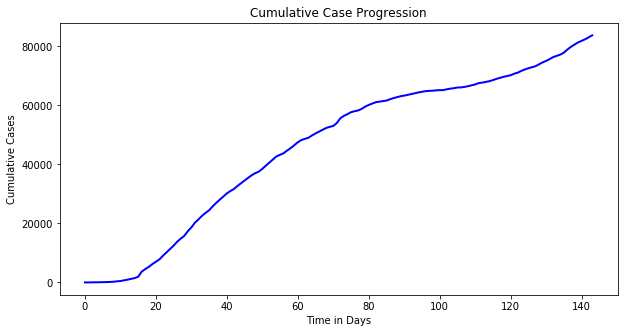

In [10]:
## chart cumulative cases
p = m_df['counter']
d = m_df['positive']

h = m_df['hospitalizedCurrently']
i = m_df['inIcuCurrently']
j = m_df['onVentilatorCurrently']

k = m_df['deathIncrease']

mpl.rcParams['figure.figsize'] = (10,5)
plt.plot(p,d, color='blue', linewidth = 2)
plt.title('Cumulative Case Progression')
plt.xlabel('Time in Days')
plt.ylabel('Cumulative Cases')
plt.show()

There were 83,730 cumulative cases as of 07/22/2020.

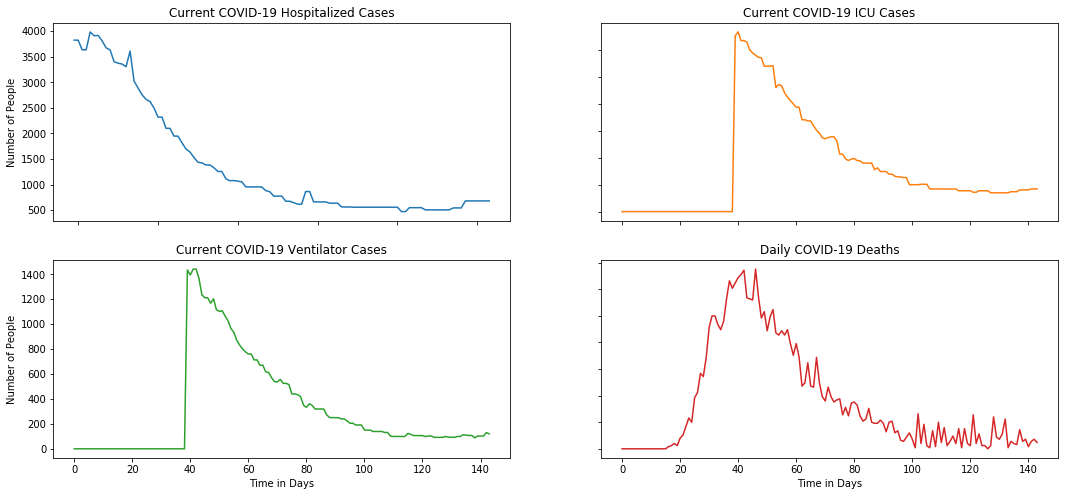

In [11]:
## compare graphs 
fig, axs = plt.subplots(2, 2, figsize= (18, 8))
axs[0, 0].plot(p, h)
axs[0, 0].set_title('Current COVID-19 Hospitalized Cases')
axs[0, 1].plot(p, i, 'tab:orange')
axs[0, 1].set_title('Current COVID-19 ICU Cases')
axs[1, 0].plot(p, j, 'tab:green')
axs[1, 0].set_title('Current COVID-19 Ventilator Cases')
axs[1, 1].plot(p, k, 'tab:red')
axs[1, 1].set_title('Daily COVID-19 Deaths')

for ax in axs.flat:
    ax.set(xlabel='Time in Days', ylabel='Number of People')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Data for ICU/ventilator cases was likely not reported prior to day 40 or there was insufficient data.

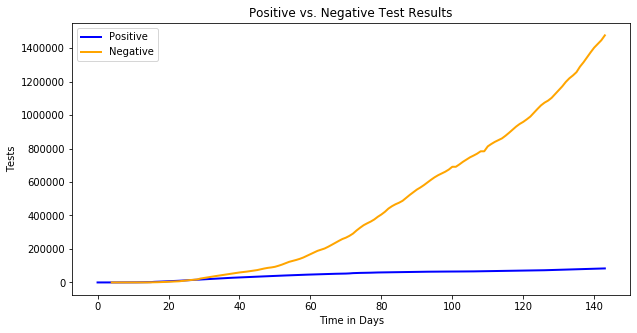

In [12]:
## chart negative vs. positive results
p_cases = m_df['positive']
n_cases = m_df['negative']

plt.title('Positive vs. Negative Test Results')
plt.xlabel('Time in Days')
plt.ylabel('Tests')

plt.plot(p, p_cases, color='blue', linewidth = 2,  label = 'Positive')
plt.plot(p, n_cases, color='orange', linewidth = 2,  label = 'Negative')

plt.legend()
plt.show()

In [13]:
## retrieve current test result numbers
print(m_df['positive'].iloc[0])
print(m_df['negative'].iloc[0])

83730
1475883.0


There were 83,730 positive tests and 1,475,883 negative tests as of 07/22/2020.